# Systems Programming

### Lecture 3: Bash scripting in UNIX

### Amir Atapour-Abarghouei

amir.atapour-abarghouei@durham.ac.uk


# Apologies I am not there in person

- Life (and death) is unexpected!
- I should be back next week.


# Practicals

- Practicals start in the coming week.
- Does everyone know where/when their practical group is?
- If not, contact myself or Anne as soon as possible!
- Make sure you fully understand the github classroom assignment (<5 minutes if you have a github account already).


# Last Lecture

- We looked at UNIX and some very basic commands for navigating around

# Today

- We will try out some more advanced bash commands and scripting

### Ethos of the UNIX Shell

-   Not one monolithic program

-   Instead many small programs

-   Allow user to combine these together to make new functionality

    -   Using pipes

    -   Using script files

### `stdin`, `stdout` and `stderr`

-   Remove the need to worry about I/O devices
-   Two types of output, each can be redirected

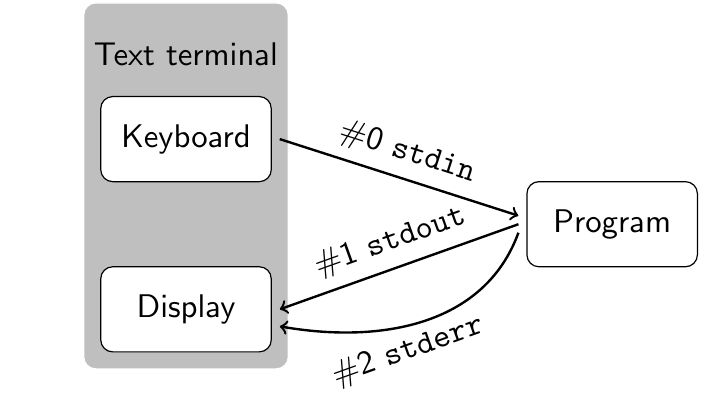


### Pipes

-   The shell provides you with many small 'tools'

    -   The power comes from composing them together

    -   Pipes provide a means to do this

    -   Each command takes input (from the keyboard)

    -   Each command produces output (to the screen)


### Pipes

-   We can redirect input or output

    -   `<` take input from a file

    -   `>` write output to a file

    -   `|` take the output of one command and use as input to next


### Output pipes

-   Add "`>`" or "`>>`" and the name of a file after your command before
    you hit "Enter/Return" -- e.g. "`ps > file.txt`"

-   If the file doesn't exist already, it will be created for you in the
    directory in which you are working

-   "`>>`" appends, "`>`" overwrites -- so be careful when using "`>`"!!


### Examples of Pipes

-   How many files in a directory?



In [ ]:
!ls

In [ ]:
!ls | wc -l

-   List a directory to file

In [ ]:
!ls > directoryList.txt
!cat directoryList.txt

-   How many lines in a file?

In [ ]:
!wc -l < directoryList.txt

### `grep`

-   `grep` is a search tool

    -   Can search through files

    -   Can also search through the results obtained by running a
        command, e.g. `ps`

-   Uses regular expressions for matching

    -   `grep "help" file.txt`

        -   Lists all lines in `file.txt` containing the word '`help`'

### Regular Expressions

-   A concise way to match different strings

    -   `*` - match any number of the proceeding character

    -   `?` - match one of the proceeding character

    -   `+` - match one or more of the proceeding character

    -   `[ABC]` - class as single character

    -   `[A-Z]` - all the upper case characters `A` to `Z`

-   e.g. `[A-Za-z]*[0-9].txt`

In [ ]:
!ls
!grep -ri "hello"

### `sort`

-   What does it sort?

-   A file (if specified)

    -   `stdin`: standard input, by default from terminal

-   Where does it put the results?

    -   `stdout`: standard output, by default the terminal

    -   or a file with `-o filename`

### `sort`

-   Can redirect output to file with `>`

    -   e.g. `sort infile.txt > outfile.txt`

-   Can redirect input from file with `<`

    -   `sort < infile.txt > outfile.txt`

    -   or `sort -o outfile.txt infile.txt`

### `tr` - translate

-   `tr SET1 SET2`

    -   translates or deletes characters from `SET1` to `SET2`

    -   e.g. `tr 'A-Z' 'a-z'` makes a lower case version of `stdin`

    -   option `-c` takes complement of `SET1`

    -   option `-s` squeezes repeats to a single character

    -   option `-d` deletes all characters in `SET1`

    -   e.g. `tr -dc '[:print:]'` - deletes all non printable characters

### `uniq`

-   Remove or report repeated lines

-   Use with `sort` to find lines repeated throughout document

-   e.g. `sort | uniq`

-   Use `-c` option to count number of repetitions

-   Tie these all together: what does this do?

In [ ]:
!cat file.txt

In [ ]:
!tr 'A-Z' 'a-z' < file.txt | tr -cs 'a-z' '\n' | sort | uniq -c | sort -n

### Defining our own UNIX command

-   UNIX commands are just executables

-   Most are written in C

- Once we have started on the C component we can also use it to write our own commands

### File handling

-   Files are stored in a hierarchical structure
-   Allows grouping
-   Navigation (summary from last lecture and some additions)

    -   `ls` - list the contents of the current folder
    -   `cd` - change folder
    -   `mkdir` - make new folder
    -   `mv` - move a file / folder
    -   `cp` - copy a file / folder
    -   `rm` - delete a file or with -r a directory)
    -   `du` - how much space does a folder / file take?
    -   `find` - list all files

# Shell scripts

-   A Shell Script is simply a collection of commands enclosed in a file

-   Why are they useful? Example: a deployed web application (written in Java) needs updating, so

       -   Tomcat web-server must be shut down

       -   program re-compiled

       -   put into a `.jar` file

       -   copied to the correct location

       -   Tomcat restarted

# Shell scripts

- Above example:

    -  involves typing in 5 separate commands at the command line

    -   not impossible, but it can get rather time-consuming

    -   Putting the 5 commands into a shell script enables them to be executed at the command line in one single command

### Writing a Shell Script

-   You can write shell scripts in any text editor of your choosing

-   They should be saved with a `.sh` extension, e.g. `myscript.sh`

-   They must all begin with the line `#!/bin/bash`

    -   "`#!`" tells UNIX this is a script that can be run

    -   `/bin/bash` tells Linux what program to run the script with

### Example

-   This script creates a new directory, changes into it and creates two
    new text files

        #!/bin/bash
        mkdir newDirectory
        cd newDirectory
        touch file1.txt
        touch file2.txt 


### How do you run a shell script?

-   Firstly, you need to make sure you have permission to execute the
    script file Use the `chmod` command to do this

    -   `chmod a+x myscript.sh`

-   Then, at the command line, type `./scriptname` and your script
    should run

    -   e.g. `./myscript.sh`

### For loops

-   A handy little tool for doing the same operation to lots of files

        #!/bin/bash
        for f in *
        do
          #something in here
          echo $f
        done

### Parameters

-   You can add parameters to a script when you run them

-   `./myscript.sh foo bar`

    -   "`foo`" and "`bar`" are the parameters here

-   Refer to them using the `$` sign in scripts

    -   `$1`, `$2`, etc.


### The `if` statement in shell scripts

    #!/bin/bash
    if [ $1 -lt $2 ] 
    then
      echo "yes" $1 "is less than" $2
    else 
      echo "no it isn't"
    fi

-   The `else` bit is optional

-   Uses `==`, `!=`, `-gt`, `-lt`, `-le`, `-ge` for equality,
    inequality, greater than, less than, less than or equal, greater
    than or equal

### Some last bits

-   `if [ -a FILE ]` - true if `FILE` exists

-   `if [ -z STRING ]` - true if `STRING` is empty

-   Variables:

    -   `VAR="Hello World"`

    -   `echo $VAR`

    -   `` TD="The time is `date`" ``

    -   `echo $TD`

        -   `The time is Wed 20 Nov 15:44:14 GMT 2019`

### Summary

-   `stdin`/`stdout`/`stderr` provide hardware independent I/O

-   Can redirect input and output

-   Use C to write new programs for UNIX

-   Shell scripts allow you to do more

-   There are

    -   1000's of commands

    -   10's of shells

    -   10's of scripting languages

-   You can do almost anything in the shell
